# Clustering Analysis Using Different Clustering Algorithms

### Overview
#### ...

### Setting up the environment and loading necessary files

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pathlib import Path

In [113]:
file_path = Path('smart_home_dataset.csv')

In [115]:
df = pd.read_csv(file_path)

In [263]:
df['Apparent Power'].mean()  # i had to check my code once again for correctness

1750.0825272067714

In [259]:
df['Apparent Power'].std()

143.88340587631487

In [261]:
df['Apparent Power'].max()

1999

In [117]:
df

Unix Timestamp  Transaction_ID  Television  Dryer  Oven  Refrigerator  \
0         1577836800               1           0      0     0             1   
1         1577839322               2           0      1     0             0   
2         1577841845               3           0      1     0             0   
3         1577844368               4           1      0     1             1   
4         1577846891               5           1      0     0             1   
...              ...             ...         ...    ...   ...           ...   
9919      1602861747            9920           0      1     0             1   
9920      1602864270            9921           0      1     1             1   
9921      1602866793            9922           0      0     1             1   
9922      1602869316            9923           1      1     0             0   
9923      1602871838            9924           1      1     0             1   

      Microwave  Line Voltage  Voltage  Apparent Power  \
0             0           237      233            1559   
1             1           232      230            1970   
2             0           223      222            1684   
3             0           225      224            1694   
4             0           222      214            1889   
...         ...           ...      ...             ...   
9919          0           222      222            1589   
9920          1           232      229            1907   
9921          1           239      237            1749   
9922          0           229      221            1950   
9923          1           238      231            1898   

      Energy Consumption (kWh)    Month Day of the Week  Hour of the Day  \
0                    24.001763  January       Wednesday                0   
1                    31.225154  January       Wednesday                0   
2                    70.460700  January       Wednesday                1   
3                    32.264043  January       Wednesday                2   
4                    32.728111  January       Wednesday                2   
...                        ...      ...             ...              ...   
9919                 63.812719  October          Friday               15   
9920                 74.335383  October          Friday               16   
9921                 61.758642  October          Friday               16   
9922                 59.248439  October          Friday               17   
9923                 86.357423  October          Friday               18   

     Offloading Decision  
0                  Local  
1                 Remote  
2                 Remote  
3                 Remote  
4                  Local  
...                  ...  
9919              Remote  
9920               Local  
9921              Remote  
9922              Remote  
9923              Remote  

[9924 rows x 15 columns]

As we can see there are 48972 rows and 15 columns which makes our dataset large enough for our clustering analyses

In [119]:
df.describe()

Unix Timestamp  Transaction_ID   Television        Dryer         Oven  \
count    9.924000e+03      9924.00000  9924.000000  9924.000000  9924.000000   
mean     1.590354e+09      4962.50000     0.500202     0.502015     0.492241   
std      7.228086e+06      2864.95637     0.500025     0.500021     0.499965   
min      1.577837e+09         1.00000     0.000000     0.000000     0.000000   
25%      1.584096e+09      2481.75000     0.000000     0.000000     0.000000   
50%      1.590354e+09      4962.50000     1.000000     1.000000     0.000000   
75%      1.596613e+09      7443.25000     1.000000     1.000000     1.000000   
max      1.602872e+09      9924.00000     1.000000     1.000000     1.000000   

       Refrigerator    Microwave  Line Voltage      Voltage  Apparent Power  \
count   9924.000000  9924.000000   9924.000000  9924.000000     9924.000000   
mean       0.506046     0.501108    229.495163   224.974002     1750.082527   
std        0.499989     0.500024      5.747332     6.405267      143.883406   
min        0.000000     0.000000    220.000000   211.000000     1500.000000   
25%        0.000000     0.000000    225.000000   220.000000     1626.000000   
50%        1.000000     1.000000    230.000000   225.000000     1747.000000   
75%        1.000000     1.000000    234.000000   230.000000     1876.000000   
max        1.000000     1.000000    239.000000   239.000000     1999.000000   

       Energy Consumption (kWh)  Hour of the Day  
count               9924.000000      9924.000000  
mean                  54.990081        11.486094  
std                   25.957348         6.922303  
min                   10.026093         0.000000  
25%                   32.430742         5.000000  
50%                   55.139939        11.000000  
75%                   77.471508        17.000000  
max                   99.993546        23.000000

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9924 entries, 0 to 9923
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unix Timestamp            9924 non-null   int64  
 1   Transaction_ID            9924 non-null   int64  
 2   Television                9924 non-null   int64  
 3   Dryer                     9924 non-null   int64  
 4   Oven                      9924 non-null   int64  
 5   Refrigerator              9924 non-null   int64  
 6   Microwave                 9924 non-null   int64  
 7   Line Voltage              9924 non-null   int64  
 8   Voltage                   9924 non-null   int64  
 9   Apparent Power            9924 non-null   int64  
 10  Energy Consumption (kWh)  9924 non-null   float64
 11  Month                     9924 non-null   object 
 12  Day of the Week           9924 non-null   object 
 13  Hour of the Day           9924 non-null   int64  
 14  Offloadi

In [123]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
Month: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October']
Day of the Week: ['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday']
Offloading Decision: ['Local' 'Remote']


In [125]:
df.describe

<bound method NDFrame.describe of       Unix Timestamp  Transaction_ID  Television  Dryer  Oven  Refrigerator  \
0         1577836800               1           0      0     0             1   
1         1577839322               2           0      1     0             0   
2         1577841845               3           0      1     0             0   
3         1577844368               4           1      0     1             1   
4         1577846891               5           1      0     0             1   
...              ...             ...         ...    ...   ...           ...   
9919      1602861747            9920           0      1     0             1   
9920      1602864270            9921           0      1     1             1   
9921      1602866793            9922           0      0     1             1   
9922      1602869316            9923           1      1     0             0   
9923      1602871838            9924           1      1     0             1   

      Microwave  

This shows an overview of our dataset including columns and their types

## Looking for missing values in columns

In [127]:
missing_values = df.isnull().sum()
missing_values

Unix Timestamp              0
Transaction_ID              0
Television                  0
Dryer                       0
Oven                        0
Refrigerator                0
Microwave                   0
Line Voltage                0
Voltage                     0
Apparent Power              0
Energy Consumption (kWh)    0
Month                       0
Day of the Week             0
Hour of the Day             0
Offloading Decision         0
dtype: int64

Here, we can see that our dataset is clean which means no values are missing
To go into detail, we can do further analyses as well. It is important for the quality of analysis

In [129]:
missing_columns = missing_values[missing_values > 0]
if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(missing_columns)

No missing values in the dataset.


Now it is clear that we dont have any missing values

Lets see it in more detail with heatmap

Text(0.5, 1.0, 'Heatmap of Missing Values')

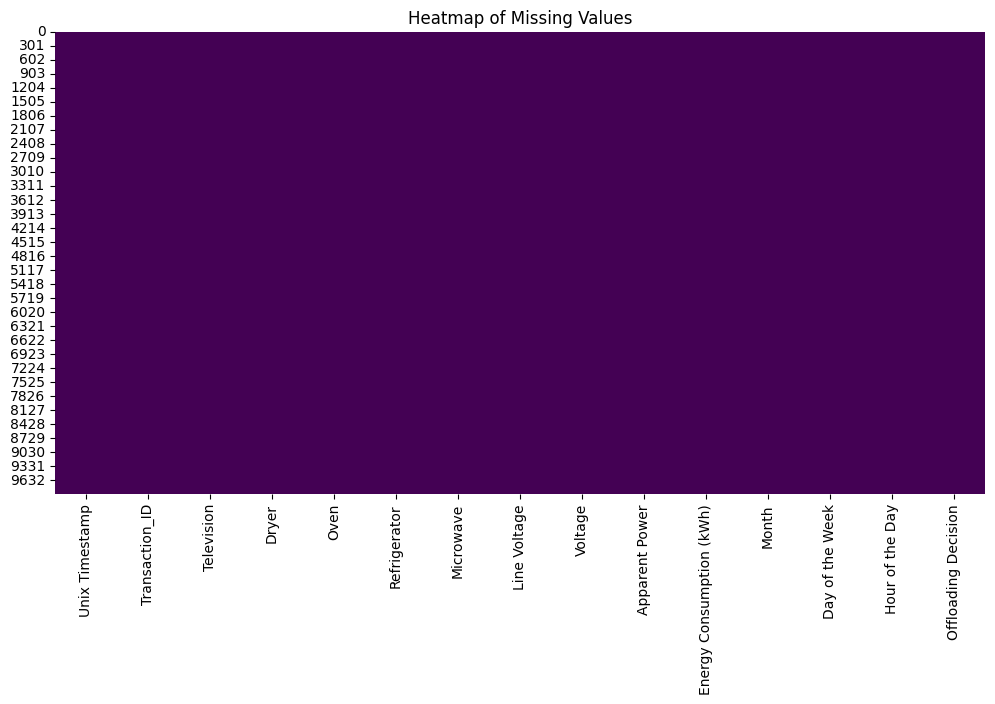

In [131]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")

### Lets combine them altogether

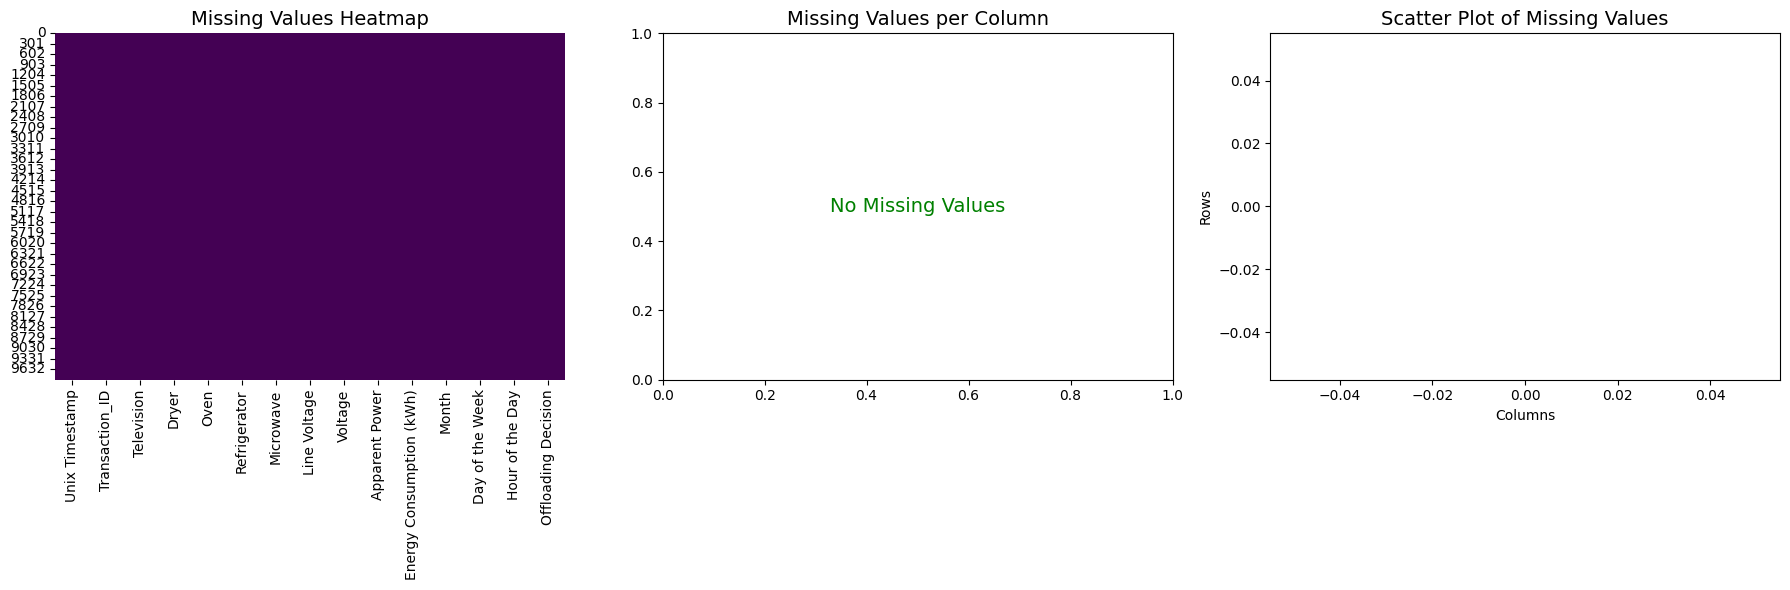

In [133]:
# Create the subplots for the heatmap, bar chart, and scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# 1. Heatmap of missing values
missing_data = df.isnull()
sns.heatmap(missing_data, cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14)

# 2. Bar chart of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only columns with missing values

# Check if there are any missing values before plotting the bar chart
if not missing_counts.empty:
    missing_counts.sort_values().plot(kind='barh', color='skyblue', ax=axes[1])
    axes[1].set_title('Missing Values per Column', fontsize=14)
    axes[1].set_xlabel('Number of Missing Values')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14, color='green')
    axes[1].set_title('Missing Values per Column', fontsize=14)

# 3. Scatter plot of missing values (showing rows and columns with missing data)
axes[2].scatter(np.where(df.isnull())[1], np.where(df.isnull())[0], color='red', s=10)
axes[2].set_title('Scatter Plot of Missing Values', fontsize=14)
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Rows')

# Show the plot
plt.tight_layout()  # Adjusts layout for better spacing
plt.show()

### Note:
### We checked for missing values, and if encountered they are handled depending on variable type

### Column Descriptions
- **Unix Timestamp**: Standardized time format for each data entry.
- **Transaction ID**: Unique identifier for each transaction or observation.
- **Appliance Usage**:
  - **Television**: Indicates if the television is in use (1) or not (0).
  - **Dryer**: Indicates if the dryer is in use (1) or not (0).
  - **Oven**: Indicates if the oven is in use (1) or not (0).
  - **Refrigerator**: Indicates if the refrigerator is in use (1) or not (0).
  - **Microwave**: Indicates if the microwave is in use (1) or not (0).
- **Voltage Metrics**:
  - **Line Voltage**: Voltage level in the electrical line.
  - **Voltage**: Voltage at the specific location.
  - **Apparent Power**: Combination of real and reactive power.
- **Energy Consumption (kWh)**: Energy consumed, measured in kilowatt-hours.
- **Month**: Month of the observation.
- **Day of the Week**: Day of the week for the observation.
- **Hour of the Day**: Hour during which the data was recorded.
- **Offloading Decision**: Simulated decision between 'Local' or 'Remote' for computational offloading.

Text(0.5, 0.98, 'Histograms of Numerical Columns')

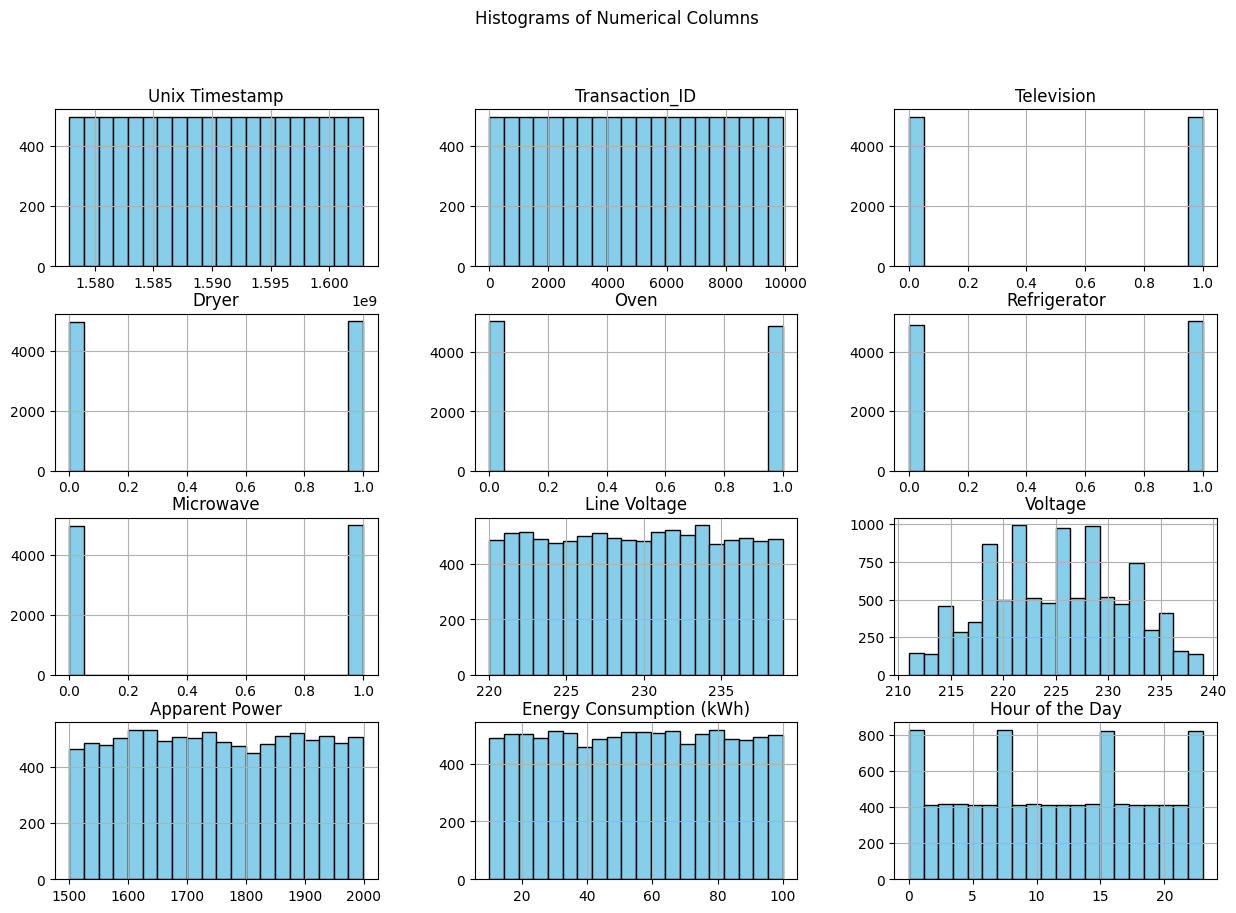

In [135]:
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")

C:\Users\khali\AppData\Local\Temp\ipykernel_4436\2695003904.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\khali\AppData\Local\Temp\ipykernel_4436\2695003904.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\khali\AppData\Local\Temp\ipykernel_4436\2695003904.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\khali\AppData\Local\Temp\ipykernel_4436\2695003904.py:5: FutureWarning: 

Passing `palette`

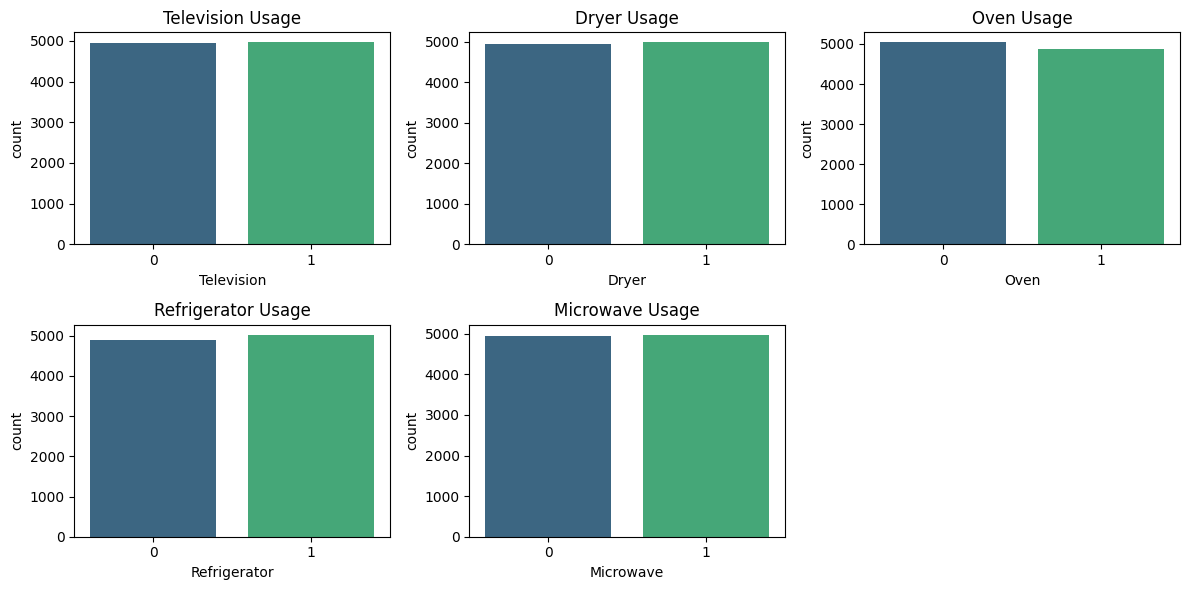

In [137]:
binary_columns = ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']
plt.figure(figsize=(12, 6))
for i, col in enumerate(binary_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"{col} Usage")
plt.tight_layout()

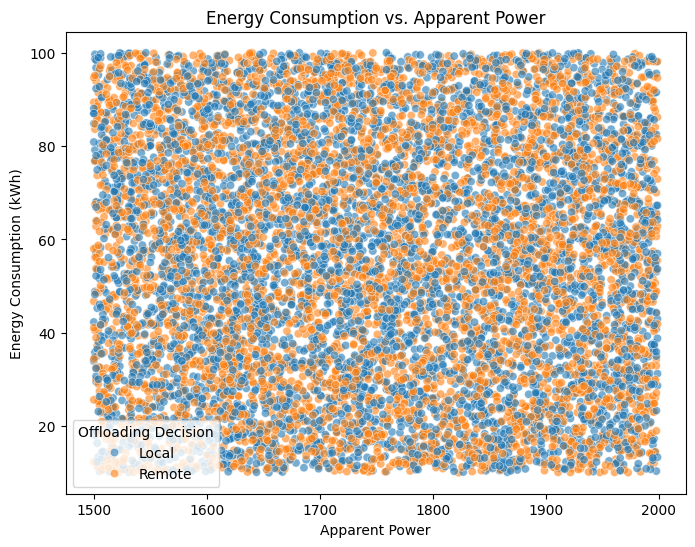

In [139]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Apparent Power', y='Energy Consumption (kWh)', data=df, hue='Offloading Decision', alpha=0.6)
plt.title("Energy Consumption vs. Apparent Power")
plt.xlabel("Apparent Power")
plt.ylabel("Energy Consumption (kWh)")
plt.legend(title='Offloading Decision')

C:\Users\khali\AppData\Local\Temp\ipykernel_4436\1843289032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Offloading Decision', data=df, palette='coolwarm')


Text(0.5, 1.0, 'Count of Offloading Decisions')

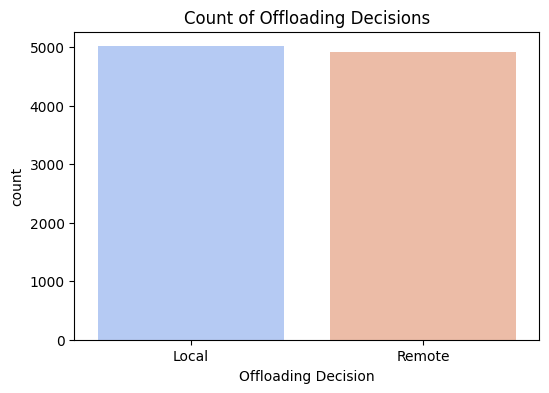

In [141]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Offloading Decision', data=df, palette='coolwarm')
plt.title("Count of Offloading Decisions")


- There are no missing values in the dataset.
- Binary indicators for appliance usage provide clear patterns for clustering analysis.
- Numerical columns li **Energy Consumption (kWh)**   **Apparent Po ** show continuous data distribution suitable for correlation and clustering.
- The **Offloading Decision** column offers a categorical variable for classification and decision analyis.


#### Visual Overview
To better understand the dataset:
- Histograms display the distribution of numerical columns.
- Bar charts show the usage frequency of binary appliance indicators.
- Scatter plots visualize relationships between energy consumption and power metrics.
- Count plots represent the distribution of offloading decisons.


 ## Principal Component Analysis (PCA) and Clustering Overview
<!--
### What is PCA and Why We Are Using It?
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining most of the original variance. PCA achieves this by identifying principal components, which are new variables that are linear combinations of the original variables.

We are using PCA to:
- Reduce the dimensionality of the dataset for clustering, simplifying complex relationships.
- Remove redundant features to improve clustering performance.
- Speed up the clustering process by focusing on the most informative features.

### What is Clustering and Why We Are Using It?
Clustering is an unsupervised machine learning technique used to group data points into clusters based on their similarities. In this project, clustering will help us:
- Identify distinct patterns of energy consumption and appliance usage in smart homes.
- Group homes with similar energy or appliance usage behaviors for targeted insights.

### Excluded Columns and Reasons:
1. **Unix Timestamp**: Irrelevant for clustering as it is a time format with no meaningful contribution to group formation.
2. **Transaction ID**: Only serves as an identifier and does not provide meaningful information for clustering.
3. **Categorical Columns**:
   - **Month**, **Day of the Week**, and **Hour of the Day**: Time-related columns, unless explicitly required, add little to clustering energy or appliance patterns.
   - **Offloading Decision**: This is a target-like categorical variable, not suitable for input clustering.

### Included Columns for Clustering:
1. **Numerical Columns**:
   - `Line Voltage`, `Voltage`, `Apparent Power`, `Energy Consumption (kWh)`.
2. **Binary Appliance Usage**:
   - `Television`, `Dryer`, `Oven`, `Refrigerator`, `Microwave`.

These columns will connect to clustering as follows:
- Numerical features provide insights into energy and power consumption patterns.
- Binary appliance usage adds behavioral patterns of homes, enabling clustering based on usage habits.

### What is K-Means and Why We Are Using It?
K-Means is a popular clustering algorithm that partitions data into `k` clusters by minimizing the within-cluster sum of squares. Each cluster is defined by its centroid.

We are using K-Means because:
- It is efficient for large datasets.
- It provides well-separated clusters based on numerical similarities.
- Suitable for understanding overall patterns in energy and appliance usage.

### What is PAM and Why We Are Using It?
Partitioning Around Medoids (PAM) is another clustering algorithm that groups data points into `k` clusters but uses medoids (actual data points) as cluster centers. It is more robust to noise and outliers compared to K-Means.

We are using PAM because:
- It provides more stable clusters when the dataset has outliers.
- It is suitable for smaller datasets or datasets where centroids may not accurately represent clusters.

### Connection Between PCA, Clustering, and Columns:
- PCA reduces the dimensionality of numerical and binary data, retaining essential variance.
- The reduced features serve as inputs for K-Means and PAM clustering.
- The results from clustering can be interpreted using the original columns (numerical and binary), allowing us to label clusters with meaningful descriptions (e.g., "High Energy Users", "Low Appliance Usage").

By combining PCA and clustering, we achieve a streamlined and meaningful analysis of smart home energy consumption and behavior patterns.
 -->

## Clustering without PCA: K-Means clustering directly on the original data without dimensionality reduction.

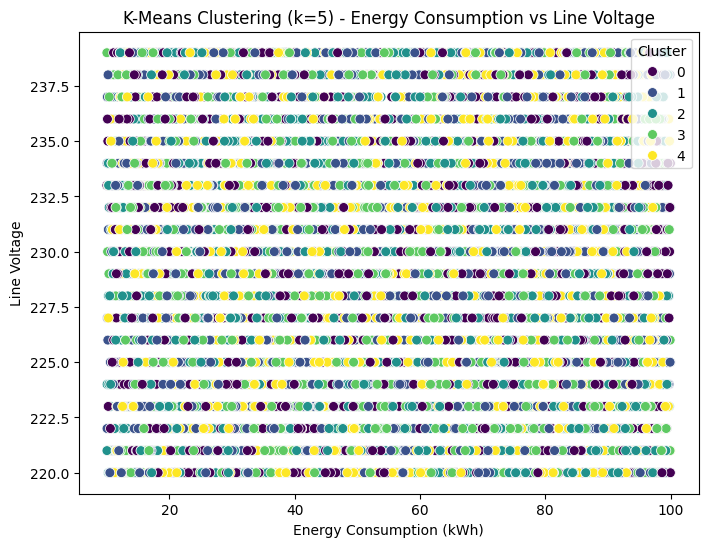

C:\Users\khali\AppData\Local\Temp\ipykernel_4436\2623699271.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


Text(0, 0.5, 'Count')

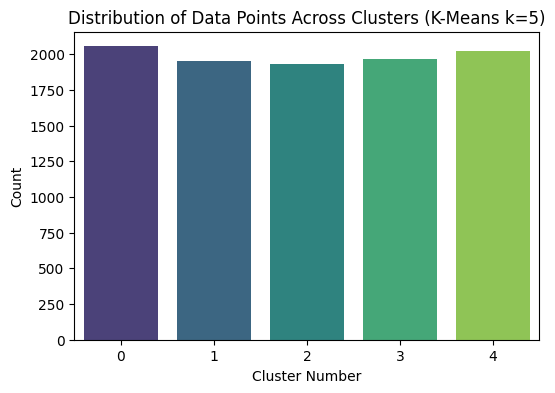

In [391]:
# Select columns for clustering (exclude non-numeric and non-relevant columns)
# columns_to_include = ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 
#                       'Line Voltage', 'Voltage', 'Apparent Power', 'Energy Consumption (kWh)', 
#                       'Hour of the Day']

columns_to_include = ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 
                      'Line Voltage', 'Voltage', 'Apparent Power', 'Energy Consumption (kWh)', 
                     ]

# Prepare the data for clustering
clustering_data = df[columns_to_include]

# Perform K-Means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_data)

# Visualizing the cluster centers for some of the features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Energy Consumption (kWh)', y='Line Voltage', hue='Cluster', palette='viridis', s=50, marker='o')
plt.title("K-Means Clustering (k=5) - Energy Consumption vs Line Voltage")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Line Voltage")
plt.legend(title="Cluster", loc='upper right')
plt.show()

# Optional: Checking the cluster distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title("Distribution of Data Points Across Clusters (K-Means k=5)")
plt.xlabel("Cluster Number")
plt.ylabel("Count")

## Clustering with PCA: K-Means clustering after applying PCA to reduce dimensionality (typically to 2 or more components).

C:\Users\khali\AppData\Local\Temp\ipykernel_4436\1747034816.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


Text(0, 0.5, 'Count')

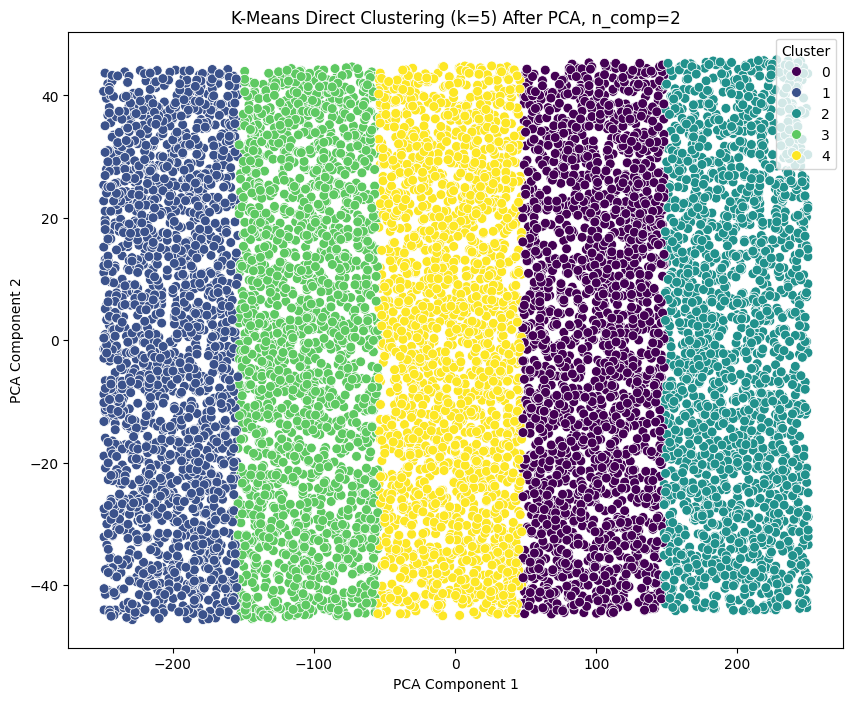

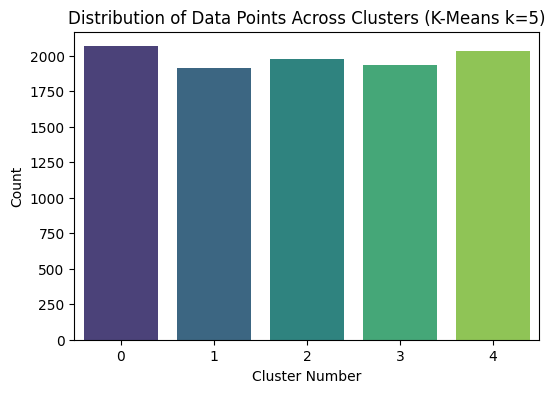

In [349]:
# Select columns for clustering (exclude non-numeric and non-relevant columns)
columns_to_include = ['Line Voltage', 'Voltage', 'Apparent Power', 
    'Energy Consumption (kWh)', 
    'Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']

# Prepare the data for clustering
clustering_data = df[columns_to_include]

# Apply PCA to reduce dimensionality (e.g., to 2 components for visualization purposes)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data)

# Perform K-Means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_components)

# Visualizing the clustering results after PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis', s=50, marker='o')
plt.title("K-Means Direct Clustering (k=5) After PCA, n_comp=2")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc='upper right')

plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title("Distribution of Data Points Across Clusters (K-Means k=5)")
plt.xlabel("Cluster Number")
plt.ylabel("Count")

<!-- ## PCA Implementation and Key Steps

### What Happened Here
1. **Selected Relevant Columns**:
   - From the dataset, we included the columns that are relevant for clustering:
     - Numerical Columns: `Line Voltage`, `Voltage`, `Apparent Power`, `Energy Consumption (kWh)`.
     - Binary Appliance Usage Columns: `Television`, `Dryer`, `Oven`, `Refrigerator`, `Microwave`.

2. **Standardized the Data**:
   - Before applying PCA, we standardized the data using `StandardScaler` to ensure that all features have a mean of 0 and a standard deviation of 1. This step is crucial because PCA is sensitive to the scale of the data.

3. **Applied PCA**:
   - PCA was applied with `n_components=0.95`, which means that the algorithm retains enough principal components to explain 95% of the variance in the data.
   - As a result, the dimensionality of the dataset was reduced from the original number of features to a smaller set of components while retaining most of the important information.

4. **Results**:
   - The original dataset had 9 features.
   - After applying PCA, the number of features was reduced (the exact number depends on the variance explained by the principal components).

### Why It Happened
1. **Dimensionality Reduction**:
   - PCA reduced the number of features by removing redundancy and combining highly correlated variables into fewer principal components. This simplifies the dataset, improves computational efficiency, and enhances clustering performance.

2. **Preservation of Variance**:
   - By retaining 95% of the variance, PCA ensures that the majority of the original information is preserved, making it suitable for subsequent clustering tasks.

### Conclusion
This step successfully prepared the dataset for clustering by reducing the dimensionality while preserving the majority of the information. The resulting dataset is now more efficient and ready for clustering analysis.
ol -->umns were included for PCA.


In [365]:
columns_to_include = [
        'Line Voltage', 'Voltage', 'Apparent Power', 
    'Energy Consumption (kWh)', 
    'Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave'
]

# Filter the dataset for clustering columns
clustering_data = df[columns_to_include]

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

# Display results
print(f"Original number of features: {clustering_data.shape[1]}")
print(f"Reduced number of features: {clustering_data_pca.shape[1]}")

Original number of features: 9
Reduced number of features: 8


In [206]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio: [0.21067144 0.11444506 0.11352847 0.11326956 0.11222147 0.11040367
 0.10892542 0.10491119]
Cumulative explained variance: [0.21067144 0.3251165  0.43864497 0.55191452 0.66413599 0.77453966
 0.88346508 0.98837627]


## Clustering with PCA but with standardization: K-Means clustering after applying PCA to standardized data (features scaled to have mean 0 and variance 1).

In [373]:
# one thing good to mention, i tried to implement fewer columns but i got less data points which led to insufficient analyses
# so 40 data points may not be sufficient for a meaningful clustering process, like i got before 

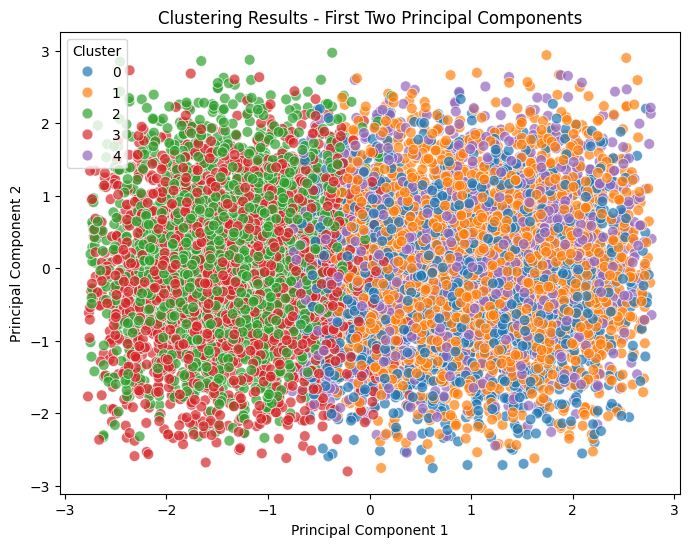

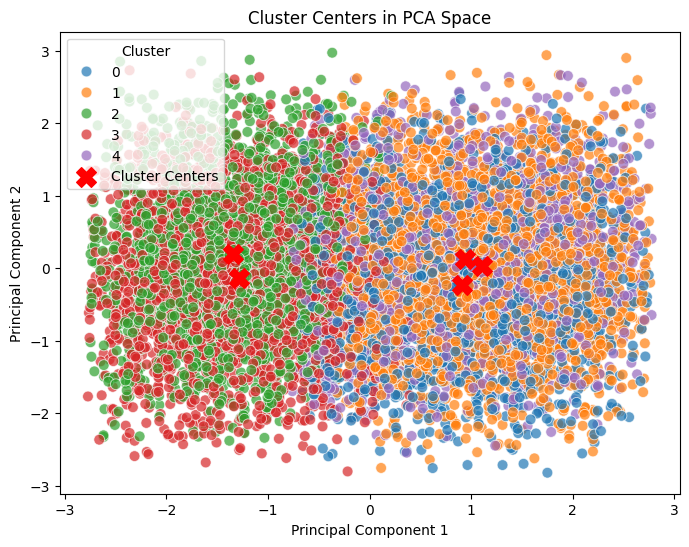

C:\Users\khali\AppData\Local\Temp\ipykernel_4436\3359060216.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


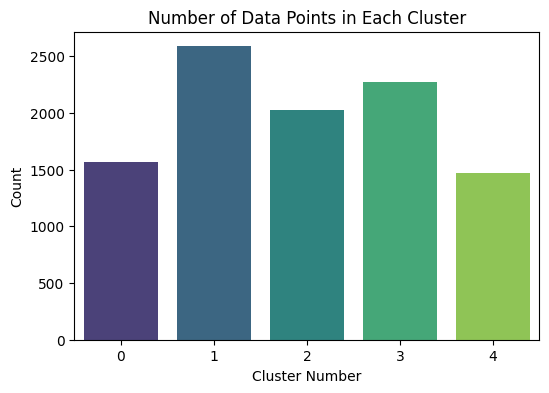

In [367]:
# Apply K-Means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(clustering_data_pca)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clustering results

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=clustering_data_pca[:, 0], y=clustering_data_pca[:, 1], hue=clusters, palette='tab10', s=60, alpha=0.7)
plt.title("Clustering Results - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Visualizing cluster centers in PCA space (first two components)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=clustering_data_pca[:, 0], y=clustering_data_pca[:, 1], hue=clusters, palette='tab10', s=60, alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("Cluster Centers in PCA Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Bar plot to show the number of data points in each cluster
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title("Number of Data Points in Each Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Count")
plt.show()

In [221]:
# for col in columns_to_include:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(x=df[col])
#     plt.title(f"Boxplot of {col}")

In [223]:
# print(clustering_data_pca)

In [458]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Elbow method to determine optimal k
# inertia = []
# for k in range(1, 11):  # Trying values of k from 1 to 10
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(clustering_data_pca)
#     inertia.append(kmeans.inertia_)

# # Plotting the Elbow graph
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, 11), inertia, marker='o', color='b')
# plt.title("Elbow Method for Optimal k")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")

## Boxplot: Line Voltage Distribution Across Clusters

The boxplot shows the distribution of **Line Voltage** across the different clusters identified by the clustering algorithm. In this visualization:
- The **x-axis** represents the cluster number (from 0 to 4), and the **y-axis** shows the **Line Voltage** values.
- The **boxes** represent the **interquartile range (IQR)**, showing the spread of the middle 50% of the data points.
- The **horizontal line inside the box** represents the **median** value of the data points in each cluster.
- The **whiskers** show the range of the data excluding outliers, and the **points outside the whiskers** indicate **outliers**.

#### Insights:
- The boxplot highlights any differences in **Line Voltage** across the clusters.
- Variability and spread in the data can be assessed, with certain clusters potentially showing higher or lower **Line Voltage** compared to others.
- The presence of outliers or large spread in some clusters indicates a more diverse range of values in that cluster.

This helps identify if clusters show significant differences in **Line Voltage** values or if there is overlap betwen clusters.


C:\Users\khali\AppData\Local\Temp\ipykernel_4436\28308345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_data, x=df['Cluster'], y='Line Voltage', palette='Set2')


Text(0, 0.5, 'Line Voltage')

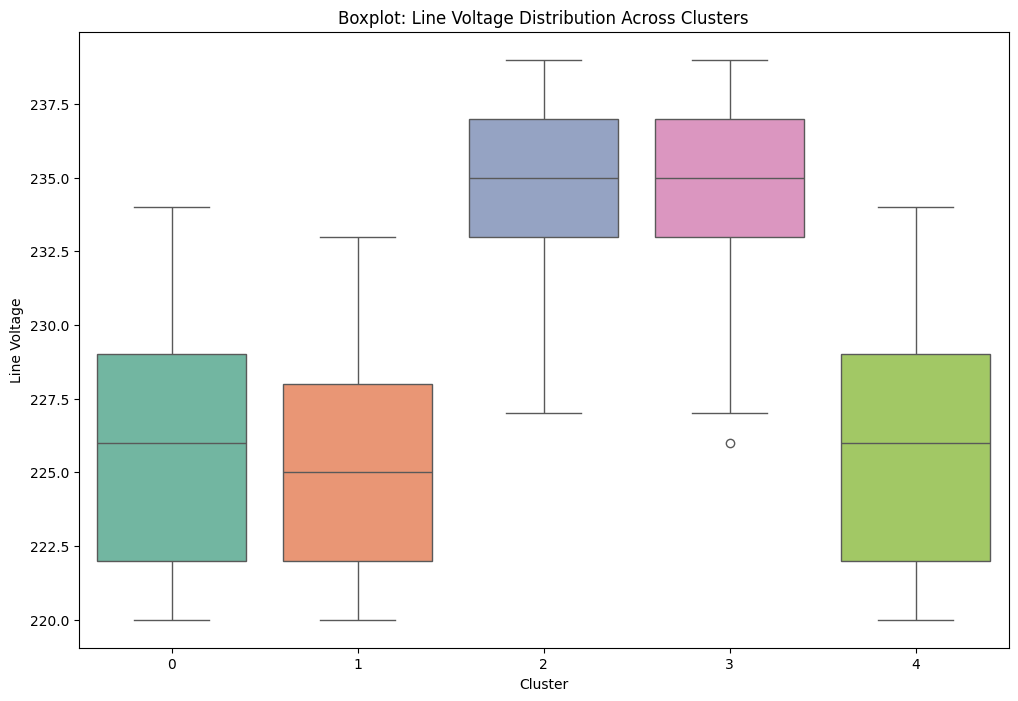

In [231]:
# Boxplot for each feature across clusters
plt.figure(figsize=(12, 8))
sns.boxplot(data=clustering_data, x=df['Cluster'], y='Line Voltage', palette='Set2')
plt.title("Boxplot: Line Voltage Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Line Voltage")

## Boxplot: Energy Consumption Across Clusters

The boxplot in this case shows the distribution of **Energy Consumption (kWh)** across the identified clusters. Here's what the plot shows:
- The **x-axis** represents the cluster numbers, and the **y-axis** shows the **Energy Consumption (kWh)** values for each cluster.
- Similar to the previous boxplot, we observe the **median**, **interquartile range**, and **outliers** for the **Energy Consumption** values in each cluster.

#### Insights:
- We can compare the **Energy Consumption** patterns across clusters, identifying if certain clusters have notably higher or lower energy usage.
- Variance within the clusters is visible, indicating whether some clusters show a consistent or wide range of **Energy Consumption** values.
- The presence of outliers can indicate unusual behavior in specific clusters, which could be worth investigating further.
  
This helps to understand if clusters represent distinct patterns of energy consumption in the smart home dataset.


C:\Users\khali\AppData\Local\Temp\ipykernel_4436\1716819312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clustering_data, x=df['Cluster'], y='Energy Consumption (kWh)', palette='Set2')


Text(0, 0.5, 'Energy Consumption (kWh)')

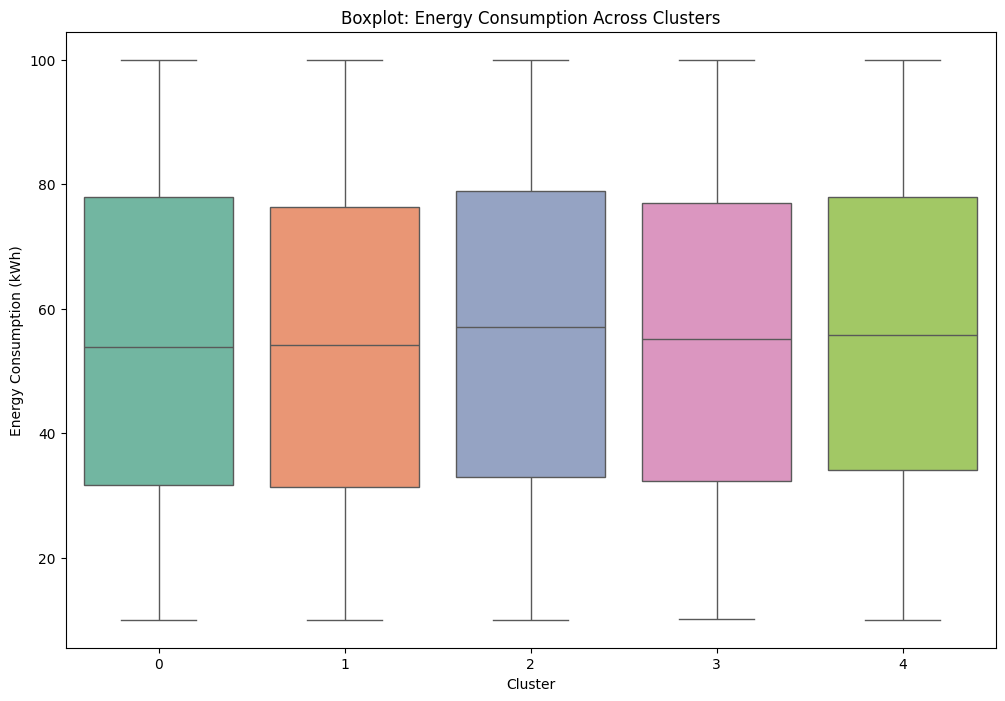

In [233]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=clustering_data, x=df['Cluster'], y='Energy Consumption (kWh)', palette='Set2')
plt.title("Boxplot: Energy Consumption Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Energy Consumption (kWh)")

## Heatmap: Correlation Matrix for Each Cluster

The heatmap shows the correlation between features within each cluster. It allows us to visualize the relationships between different variables for each cluster. In the heatmap:
- Each **cell** represents the correlation between two features. The color intensity indicates the strength of the correlation, with blue showing negative correlations and red showing positive correlations.
- The **numbers in each cell** show the exact correlation coefficient between the features, ranging from -1 (strong negative correlation) to +1 (strong positive correlation).

#### Insights:
- Correlations within each cluster reveal how different features (such as **Energy Consumption**, **Voltage**, and **Appliance Usage**) are related to each other in that specific cluster.
- A high positive correlation (e.g., between **Energy Consumption** and **Voltage**) in some clusters might suggest that higher energy consumption correlates with increased voltage.
- Negative correlations or weak correlations might indicate that certain features are independent of each other within the clusters.

This heatmap can provide valuable information on how feature relationships change from one cluster to another.

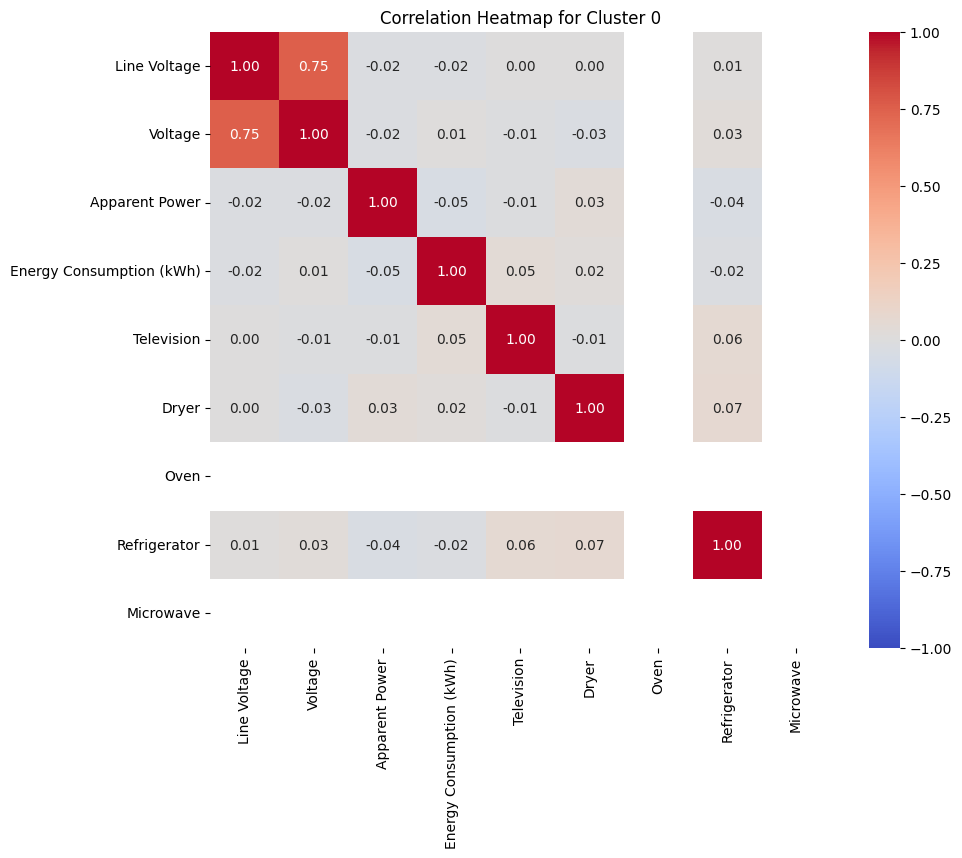

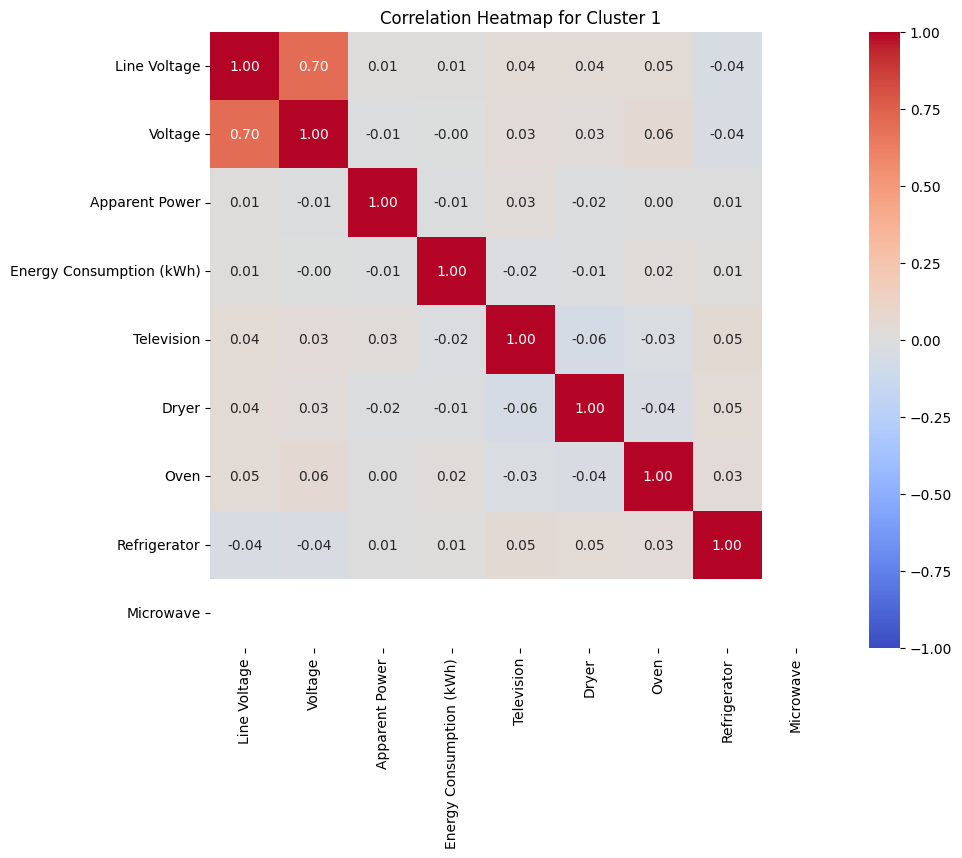

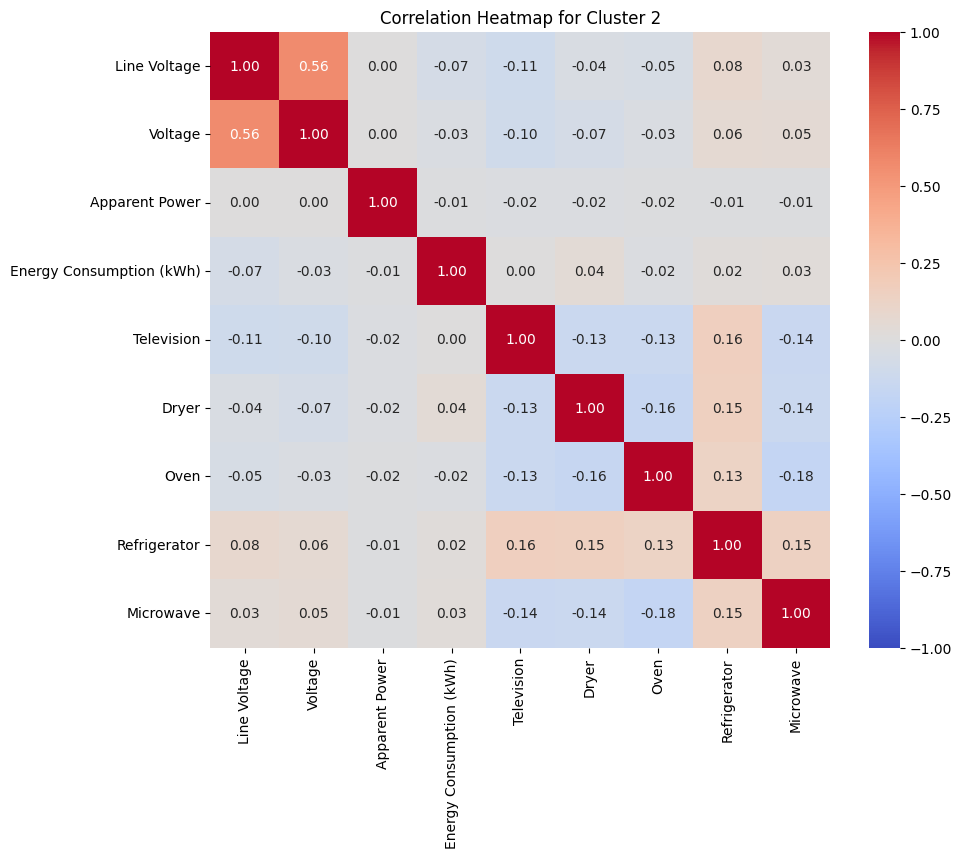

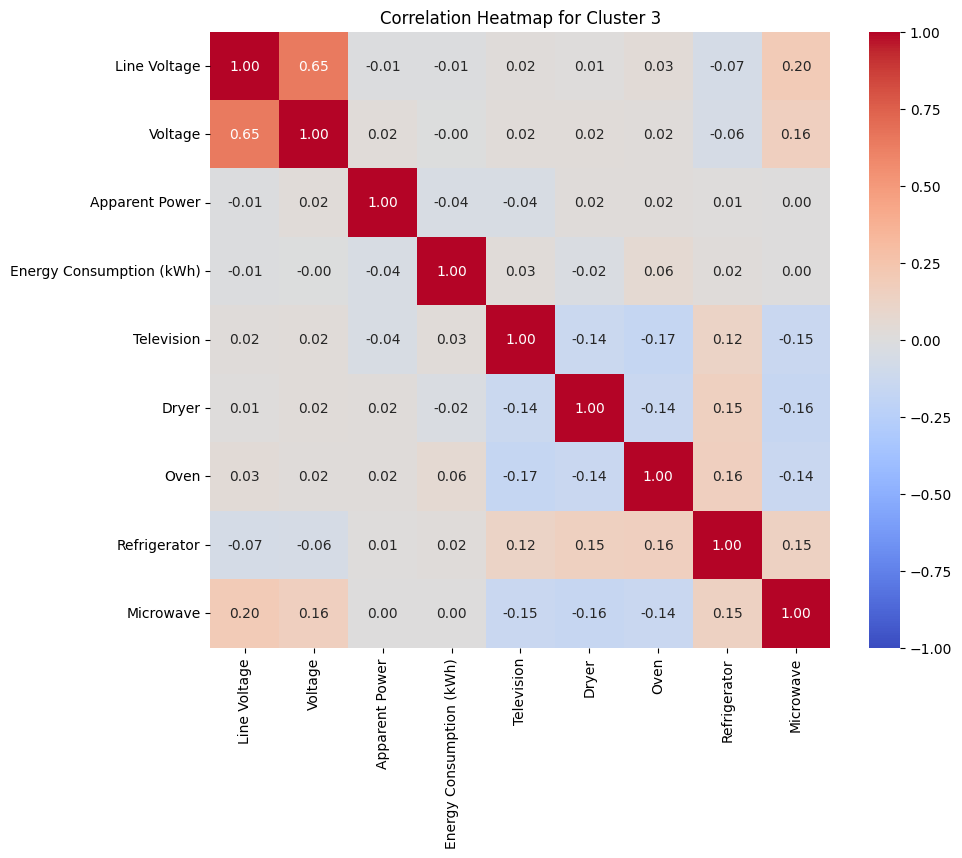

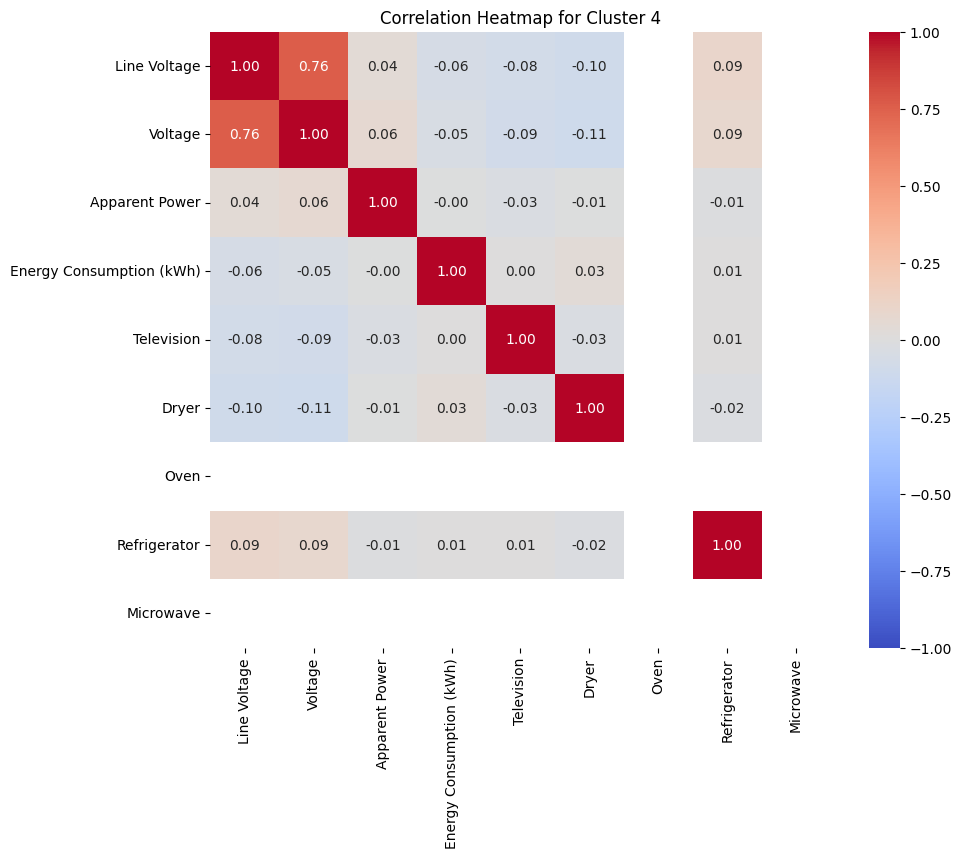

In [235]:
for cluster_num in range(5):
    cluster_data = clustering_data[df['Cluster'] == cluster_num]
    correlation_matrix = cluster_data.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(f"Correlation Heatmap for Cluster {cluster_num}")
    plt.show()

## Bar Chart: Mean Feature Values Across Clusters

The bar chart here shows the **mean values of each feature** across the different clusters. The **x-axis** represents the cluster number, and the **y-axis** represents the **mean value** for each feature (e.g., **Line Voltage**, **Energy Consumption**, etc.).

#### Insights:
- This chart helps us understand the central tendency of each feature for the clusters. For example, we can see which clusters have the highest or lowest **Energy Consumption** or **Voltage**.
- Features like **Television** and **Microwave** usage can show distinct patterns, such as some clusters having higher usage of certain appliances.
- Differences in mean values across clusters can highlight what makes each cluster unique and help identify the main characteristics of each cluster.

This visualization is crucial for understanding the typical values for features in each cluster, providing a summary of the clusters' defining charactristics.


<Figure size 1200x800 with 0 Axes>

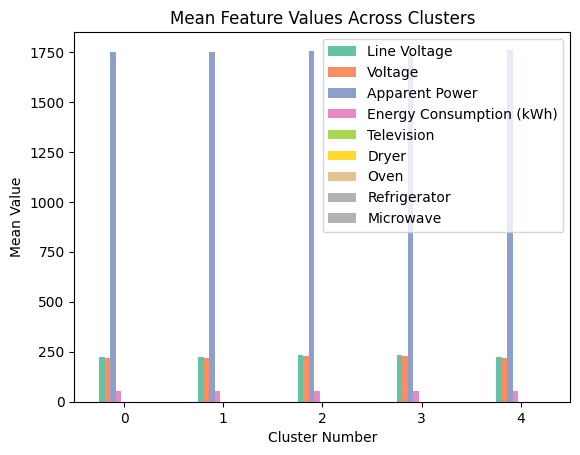

In [251]:
mean_values = df.groupby('Cluster')[columns_to_include].mean()
plt.figure(figsize=(12, 8))
mean_values.plot(kind='bar', stacked=False, colormap='Set2')
plt.title("Mean Feature Values Across Clusters")
plt.ylabel("Mean Value")
plt.xlabel("Cluster Number")
plt.xticks(rotation=0)
plt.show()

## Statistical Summary

In [393]:
# Displaying statistical summary for each cluster
for cluster_num in range(5):  # Adjust this to the number of clusters (5 in your case)
    print(f"Statistical Summary for Cluster {cluster_num}:")
    
    # Filter the data for the current cluster
    cluster_data = df[df['Cluster'] == cluster_num]  # Use the 'Cluster' column for filtering
    
    # Display statistical summary for the cluster
    display(cluster_data[columns_to_include].describe())  # Adjust columns_to_include as needed
    print("\n")

Statistical Summary for Cluster 0:


Television        Dryer         Oven  Refrigerator    Microwave  \
count  2055.000000  2055.000000  2055.000000   2055.000000  2055.000000   
mean      0.507543     0.489538     0.471046      0.500730     0.478832   
std       0.500065     0.500012     0.499282      0.500121     0.499673   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       1.000000     0.000000     0.000000      1.000000     0.000000   
75%       1.000000     1.000000     1.000000      1.000000     1.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       Line Voltage      Voltage  Apparent Power  Energy Consumption (kWh)  
count   2055.000000  2055.000000     2055.000000               2055.000000  
mean     229.654501   225.229197     1649.099270                 55.172189  
std        5.762954     6.406205       28.908156                 25.970742  
min      220.000000   211.000000     1600.000000                 10.026093  
25%      225.000000   220.000000     1624.000000                 32.899579  
50%      230.000000   225.000000     1648.000000                 55.411809  
75%      234.500000   230.000000     1674.000000                 77.750320  
max      239.000000   239.000000     1699.000000                 99.993546



Statistical Summary for Cluster 1:


Television        Dryer         Oven  Refrigerator    Microwave  \
count  1953.000000  1953.000000  1953.000000   1953.000000  1953.000000   
mean      0.503840     0.508961     0.502304      0.487967     0.506912   
std       0.500113     0.500048     0.500123      0.499983     0.500080   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       1.000000     1.000000     1.000000      0.000000     1.000000   
75%       1.000000     1.000000     1.000000      1.000000     1.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       Line Voltage      Voltage  Apparent Power  Energy Consumption (kWh)  
count   1953.000000  1953.000000     1953.000000               1953.000000  
mean     229.607783   225.108551     1950.696365                 54.316354  
std        5.725874     6.455435       28.237874                 25.700509  
min      220.000000   211.000000     1902.000000                 10.050551  
25%      225.000000   220.000000     1926.000000                 31.339577  
50%      230.000000   225.000000     1950.000000                 54.088357  
75%      235.000000   230.000000     1975.000000                 76.621600  
max      239.000000   239.000000     1999.000000                 99.949796



Statistical Summary for Cluster 2:


Television        Dryer         Oven  Refrigerator    Microwave  \
count  1930.000000  1930.000000  1930.000000   1930.000000  1930.000000   
mean      0.505699     0.509326     0.488083      0.506736     0.491710   
std       0.500097     0.500043     0.499988      0.500084     0.500061   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       1.000000     1.000000     0.000000      1.000000     0.000000   
75%       1.000000     1.000000     1.000000      1.000000     1.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       Line Voltage      Voltage  Apparent Power  Energy Consumption (kWh)  
count   1930.000000  1930.000000     1930.000000               1930.000000  
mean     229.414508   224.796373     1550.421762                 56.063590  
std        5.815212     6.413316       28.843248                 26.181913  
min      220.000000   211.000000     1500.000000                 10.041668  
25%      224.000000   220.000000     1526.000000                 33.175254  
50%      230.000000   225.000000     1550.000000                 56.927053  
75%      234.000000   230.000000     1576.000000                 79.211830  
max      239.000000   239.000000     1600.000000                 99.964947



Statistical Summary for Cluster 3:


Television        Dryer         Oven  Refrigerator    Microwave  \
count  1966.000000  1966.000000  1966.000000   1966.000000  1966.000000   
mean      0.488301     0.497457     0.505086      0.510173     0.511699   
std       0.499990     0.500121     0.500101      0.500024     0.499990   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     1.000000      1.000000     1.000000   
75%       1.000000     1.000000     1.000000      1.000000     1.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       Line Voltage      Voltage  Apparent Power  Energy Consumption (kWh)  
count   1966.000000  1966.000000     1966.000000               1966.000000  
mean     229.211089   224.712106     1852.781790                 54.276927  
std        5.659076     6.262252       28.861514                 26.074134  
min      220.000000   211.000000     1801.000000                 10.027065  
25%      224.000000   220.000000     1829.000000                 31.954766  
50%      229.000000   225.000000     1854.000000                 54.101458  
75%      234.000000   230.000000     1878.000000                 76.931496  
max      239.000000   239.000000     1901.000000                 99.947487



Statistical Summary for Cluster 4:


Television        Dryer         Oven  Refrigerator    Microwave  \
count  2020.000000  2020.000000  2020.000000   2020.000000  2020.000000   
mean      0.495545     0.505446     0.495545      0.524257     0.516832   
std       0.500104     0.500094     0.500104      0.499535     0.499840   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     1.000000     0.000000      1.000000     1.000000   
75%       1.000000     1.000000     1.000000      1.000000     1.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       Line Voltage      Voltage  Apparent Power  Energy Consumption (kWh)  
count   2020.000000  2020.000000     2020.000000               2020.000000  
mean     229.577723   225.008911     1749.666832                 55.124609  
std        5.766498     6.477294       28.888445                 25.846665  
min      220.000000   211.000000     1700.000000                 10.205142  
25%      225.000000   220.000000     1725.000000                 32.274384  
50%      230.000000   225.000000     1749.000000                 54.678461  
75%      234.000000   230.000000     1775.000000                 76.846505  
max      239.000000   239.000000     1801.000000                 99.986446

In [411]:
!pip install pyclustertend

  Using cached pyclustertend-1.9.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached pyclustertend-1.9.0-py3-none-any.whl (7.2 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.3


ERROR: Cannot uninstall matplotlib 3.9.3, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps matplotlib==3.9.3'.


### Hopkins Statistic

The Hopkins Statistic is a measure used to assess the clusterability of data. It evaluates how well the data is suited for clustering. The statistic value ranges from **0 to 1**:

- A value close to **1** indicates that the data is highly likely to form clusters (i.e., the data is clustered well).
- A value close to **0** suggests that the data is uniformly distributed and does not have any inherent clusters.

#### Calculation of Hopkins Statistic:
1. **Nearest Neighbors**: We use the **NearestNeighbors** algorithm to calculate the distances between the points in our dataset.
2. **Random Sampling**: A set of random points is generated within the feature space, and their nearest neighbors are calculated.
3. **Comparison**: The Hopkins statistic is computed by comparing the distances of data points to the distances of random points. 

Formula:
\[
H = \frac{ \sum_{i=1}^{m} \text{Distance to nearest neighbor of random points} } { \sum_{i=1}^{m} \text{Distance to nearest neighbor of data points} + \sum_{i=1}^{m} \text{Distance to nearest neighbor of random points} }
\]

Where:
- \( H \) is the Hopkins statistic.
- \( m \) is the number of points used in the sample (typically 10% of the total data points).
- \( d \) is the number of features or dimensions of the dataset.

#### Result:
For our dataset, the Hopkins statistic calculated was **1.0**, which suggests that the dataset is highly clustered, meaning that there is a strong inherent structure suitable for clustering.

The value of **1.0** indicates a perfect clustering situation where the data points are highly spatially concentrated, and we can expect the clustering alorithms to perform well.


Hopkins Statistic: 1.0


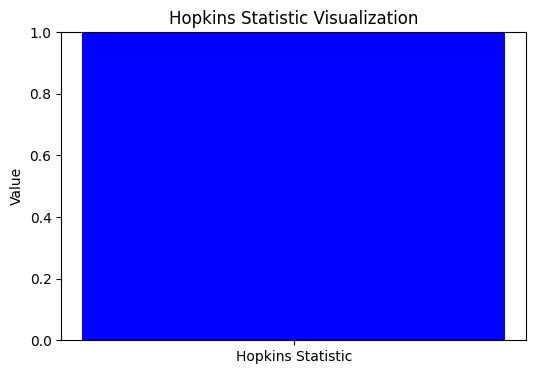

In [429]:
from sklearn.neighbors import NearestNeighbors
numeric_columns = df.select_dtypes(include=[np.number]).columns
def hopkins_statistic(X):
    """ Calculate the Hopkins Statistic to assess the clusterability of data """
    d = X.shape[1]  # Number of dimensions (features)
    n = len(X)  # Number of points
    m = int(0.1 * n)  # Take 10% of the data points as the sample size

    # Initialize NearestNeighbors to calculate nearest distances
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    uj = 0.0
    wj = 0.0
    for j in range(m):
        # Calculate the distance to the nearest point for a random point
        u_dist, _ = nbrs.kneighbors(np.random.uniform(X.min(), X.max(), (1, d)), return_distance=True)
        uj += u_dist[0][0]
        # Calculate the distance to the nearest point for actual points in the dataset
        w_dist, _ = nbrs.kneighbors(X.loc[[np.random.choice(X.index)], :].values, return_distance=True)
        wj += w_dist[0][0]

    H = uj / (uj + wj)  # Hopkins statistic formula
    return H

# Apply the function to your dataset
hopkins_stat = hopkins_statistic(df[numeric_columns])
print("Hopkins Statistic:", hopkins_stat)

# Visualize the Hopkins Statistic
plt.figure(figsize=(6, 4))
plt.bar('Hopkins Statistic', hopkins_stat, color='blue')
plt.ylim(0, 1)  # Hopkins statistic value ranges from 0 to 1
plt.ylabel('Value')
plt.title('Hopkins Statistic Visualization')
plt.show()

## Davies-Bouldin Index

### Davies-Bouldin Index

The **Davies-Bouldin Index (DBI)** is a metric used to evaluate the quality of clustering results. It measures the average similarity ratio of each cluster with the one that is most similar to it. The DBI calculates the ratio of the within-cluster scatter to the between-cluster separation. Lower values of the DBI indicate better clustering, as it implies that the clusters are compact and well-separated.

#### Formula:
\[
DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{i \neq j} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
\]
Where:
- \( k \) is the number of clusters.
- \( \sigma_i \) is the average distance of points within cluster \( i \) to the centroid of that cluster (within-cluster scatter).
- \( d(c_i, c_j) \) is the distance between the centroids of clusters \( i \) and \( j \) (between-cluster separation).

#### Interpretation:
- A **lower Davies-Bouldin Index** indicates **better clustering**, as it shows that the clusters are both compact and well-separated.
- A **higher Davies-Bouldin Index** suggests that the clusters are either overlapping or not well-separated.

#### Result:
The Davies-Bouldin Index for our clustering is **2.54**. This value suggests that while the clusters have some separation, the compactness and separation of the clusters may not be ideal. A DBI value closer to **1** is generally considered ideal, as it would indicate clusters that are compact and well-separated.

In the context of our dataset, a DBI value of **2.54** suggests that there is room for improvement in terms of clustering quality, either by adjusting the number of clusters or considering other clustering algorithms.


In [436]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

# Perform K-Means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Compute Davies-Bouldin Index
db_score = davies_bouldin_score(clustering_data_scaled, clusters)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 2.5376463804180114


## Silvetta Score

Silhouette Score: 0.1423592510739246


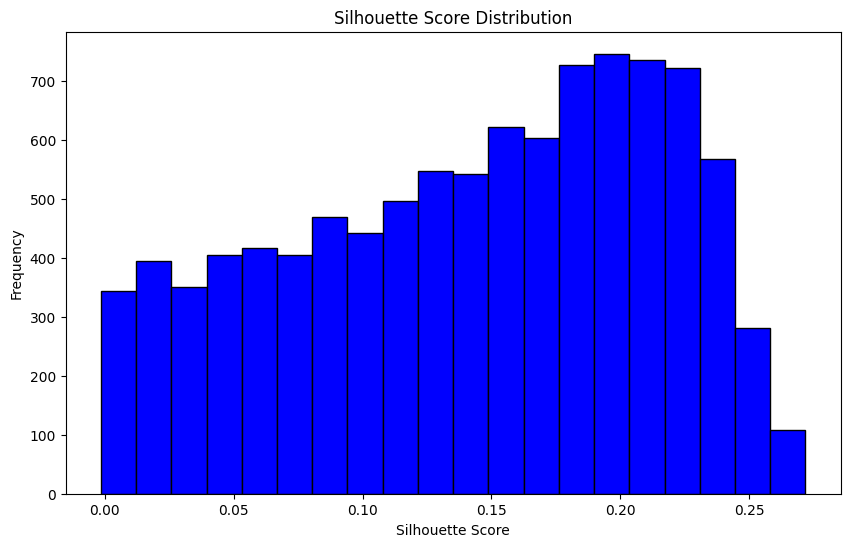

In [452]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Perform K-Means clustering with k=5
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Compute silhouette score
sil_score = silhouette_score(clustering_data_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

# Plotting Silhouette Score for each sample
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

sample_silhouette_values = silhouette_samples(clustering_data_scaled, clusters)

plt.figure(figsize=(10, 6))
plt.hist(sample_silhouette_values, bins=20, color='blue', edgecolor='black')
plt.title("Silhouette Score Distribution")
plt.xlabel("Silhouette Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# this suggestes that score is not optimal

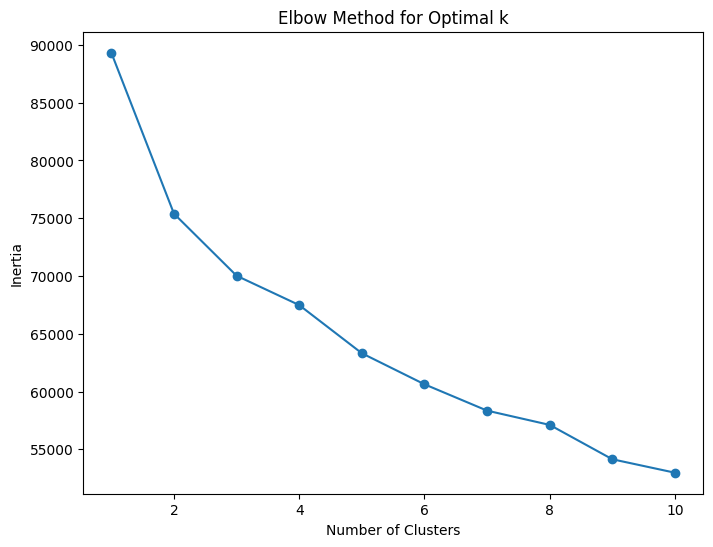

In [460]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS (Within-Cluster Sum of Squares) for different values of k
wcss = []
for k in range(1, 11):  # Try k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()